In [122]:
import gym
import sys

sys.path.append("../")
from baselines import deepq
from baselines import bench
from baselines import logger
from baselines.common.atari_wrappers import make_atari
from baselines.common import models

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
logger.configure()
env = gym.make("MIMIC-Sepsis-v0")
model = deepq.learn(
    env,
    total_timesteps=int(10000),
    network=models.mlp(num_hidden=64, num_layers=1),
)

model.save('dqn.model')
env.close()

Logging to /var/folders/8n/hv90dq791k33bzy8494y8ml80000gn/T/openai-2019-03-17-20-55-21-264992
--------------------------------------
| % time spent exploring  | 87       |
| episodes                | 100      |
| mean 100 episode reward | -15      |
| steps                   | 125      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 75       |
| episodes                | 200      |
| mean 100 episode reward | -15      |
| steps                   | 248      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 64       |
| episodes                | 300      |
| mean 100 episode reward | -15      |
| steps                   | 365      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 51       |
| episodes                | 400      |
| mean 100 episode reward | -15      |
| steps                   | 497      |
---------

In [56]:
test_data = pd.read_csv("../cs238_sepsis_rl/data/test_state_action_reward_df.csv")

In [40]:
rewards = []
steps = []
for i in range(2000):
    if i%100 == 0 and i>0:
        print("Done with %d steps..." % i)

    obs, done = env.reset(), False
    episode_rew = 0
    total_steps = 0

    while not done: 
        obs, rew, done, _ = env.step(model(obs[None])[0])
        episode_rew += rew
        total_steps += 1
    rewards.append(episode_rew)
    steps.append(total_steps)

Done with 100 steps...
Done with 200 steps...
Done with 300 steps...
Done with 400 steps...
Done with 500 steps...
Done with 600 steps...
Done with 700 steps...
Done with 800 steps...
Done with 900 steps...
Done with 1000 steps...
Done with 1100 steps...
Done with 1200 steps...
Done with 1300 steps...
Done with 1400 steps...
Done with 1500 steps...
Done with 1600 steps...
Done with 1700 steps...
Done with 1800 steps...
Done with 1900 steps...


In [53]:
df = pd.DataFrame()
df["rewards"] = rewards
df[df["rewards"] > -15]

,rewards
14,15
71,15
239,15
457,15
564,15
667,15
949,15
983,15
1104,15
1162,15


Text(0.5, 1.0, 'Learned Policy Episode Length')

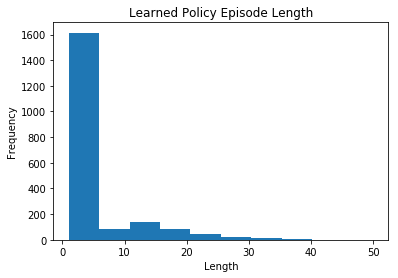

In [206]:
plt.hist(steps)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Learned Policy Episode Length")

Text(0.5, 1.0, "Physician's Policy Episode Length")

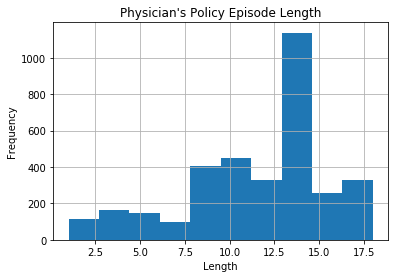

In [212]:
test_data.groupby(['subject_id','hadm_id',  'icustay_id']).count()["BUN"].hist()
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Physician's Policy Episode Length")

Text(0.5, 1.0, 'Learned Policy Episode Length')

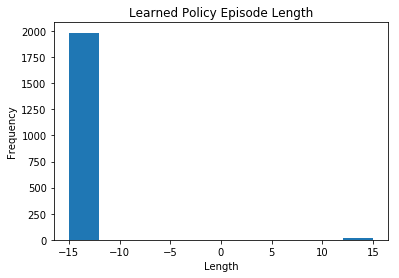

In [205]:
plt.hist(rewards)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Learned Policy Episode Length")

In [57]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE',
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']



In [84]:
test_data_episodes = test_data.groupby(['subject_id','hadm_id','icustay_id']).cumcount()+1

In [99]:
starting_indicis = test_data_episodes[test_data_episodes== 1].reset_index()["index"].values

In [136]:
starting_indicis

array([    0,     6,    24, ..., 39192, 39205, 39218])

In [189]:
histories = []
i=6
start_state = test_data[columns].iloc[i].values
print(start_state[columns.index("HeartRate")])
history = []
obs, done = env.reset(starting_state=start_state), False
total_steps = 0
history.append(obs)
while not done:
    print(model(obs[None]))
    obs, rew, done, _ = env.step(model(obs[None])[0])
    history.append(obs)
    print(obs[columns.index("HeartRate")])
    episode_rew += rew
    total_steps += 1
print("Number of steps:" ,len(history))    

-1.1602840670182104
[2]
[[0.02995463]]
[0]
[[0.01943823]]
[0]
[[0.02046996]]
[0]
[[0.01943657]]
[0]
[[0.01464458]]
[0]
[[0.0118325]]
[0]
[[0.00962013]]
[0]
[[0.00851515]]
[0]
[[0.00714082]]
[0]
[[0.00641514]]
[0]
[[0.0013763]]
[0]
[[0.00220198]]
[0]
[[0.00234093]]
Number of steps: 14


In [152]:
test_data[columns].iloc[6].values[columns.index("HeartRate")]

-1.1602840670182104

In [181]:
test_data.iloc[6: 24]["HeartRate"]

6    -1.160284
7    -1.150156
8    -1.208281
9    -1.116691
10   -1.116691
11   -1.116691
12   -2.182311
13   -1.664032
14   -1.184503
15   -1.446064
16   -1.467861
17   -1.324531
18   -0.414350
19   -0.675911
20   -0.835754
21   -0.675911
22   -0.704974
23   -0.446318
Name: HeartRate, dtype: float64

In [195]:
def plot_agent(feature):
    plt.plot(np.array(history)[:,columns.index(feature)].reshape(14))
    plt.title(feature + " Under Agent's Treatment")
    plt.xlabel("Step")
    plt.ylabel("Normalized value")

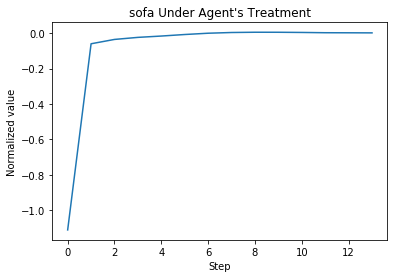

In [201]:
plot_agent("sofa")

In [202]:
def plot_doctor(feature):
    plt.plot(test_data.iloc[6: 24][feature])
    plt.title(feature + " Under Physicians's Treatment")
    plt.xlabel("Step")
    plt.ylabel("Normalized value")



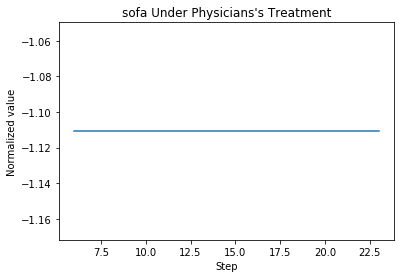

In [203]:
plot_doctor("sofa")